In [2]:
%matplotlib inline
import matplotlib

In [3]:
import csv
import numpy as np
import pandas as pd
matplotlib.style.use('seaborn')
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
cubic = ["W","V","K","Al","Cu","Pd"]
hcp = ["Ti","Re","Y"]
metals = cubic+hcp
semi = ["Si"]
insul = ["NaCl"]

In [4]:
def get_mean_data_kpd(method,elements,sub_method=None):
    """Gathers the convergence data for the given method, element, 
    and sub-method, i.e. 'sc' for the Froyen method, and places it
    in a pandas dataframe where each column is a different cell 
    size and each row is a different k-point density. The dataframe also
    contains the mean error per density and numbder of instances 
    the density occures.
    
    Args:
        methad (str): "Froyen", "Mueller", or "Aflow"
        elements (list of str): A list consisting of the desired 
            elements ("V", "W", "Cu", "Al", "K", "Pd", "Ti", "Y", "Re")
        sub_method (str, optional): The sampling scheme for the 
            Froyen method ("sc", "bcc", "fcc", "hcp"). A sub_method is
            required for the Froyen method and for any other method
            this should be None.
    
    Returns:
        outdf (pandas.dataframe): A pandas dataframe of the error in
            the calculated energy at each density (row) and supercell 
            (column) in addition to a column of the average error per
            density.
    """
    for el in elements:
        if el in ["Ti","Y","Re"]:
            sizes = range(1,8)
        else:
            sizes = range(1,12)
            
        for i in sizes:
            data = []
            kpd = []
            if sub_method is None:
                f = open("../data2/{0}/{1}_conv/{2}_atom_kpd_conv.csv".format(method,el,i),"r")
            else:
                f = open("../data2/{0}/{1}_conv/{2}_{3}_atom_kpd_conv.csv".format(method,el,i,sub_method),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                if float(row[0]) in kpd and float(row[1]) != 0:
                    loc = kpd.index(float(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                elif float(row[1]) != 0:
                    kpd.append(float(row[0]))
                    point = [float(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("Method: {0}, element: {1}, size: {2}".format(method,el,i))
                
            if i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    outdf['count'] = outdf.apply(lambda x: x.count(), axis=1)
    return outdf

In [5]:
Fus_sc_metals = get_mean_data_kpd("Froyen",["W","K","Al","Cu","Pd"],sub_method="sc")
Fus_bcc_metals = get_mean_data_kpd("Froyen",["W","K","Al","Cu","Pd"],sub_method="bcc")
Fus_fcc_metals = get_mean_data_kpd("Froyen",["W","K","Al","Cu","Pd"],sub_method="fcc")

In [6]:
Fus_sc_mean = np.transpose([Fus_sc_metals.index.values,Fus_sc_metals["mean"]])
Fus_bcc_mean = np.transpose([Fus_bcc_metals.index.values,Fus_bcc_metals["mean"]])
Fus_fcc_mean = np.transpose([Fus_fcc_metals.index.values,Fus_fcc_metals["mean"]])
Fus_mean = np.concatenate((Fus_sc_mean,Fus_bcc_mean,Fus_fcc_mean),axis=0)

In [7]:
Fv_sc_metals = get_mean_data_kpd("Froyen_VASP",["W","K","Al","Cu","Pd"],sub_method="sc")
Fv_bcc_metals = get_mean_data_kpd("Froyen_VASP",["W","K","Al","Cu","Pd"],sub_method="bcc")
Fv_fcc_metals = get_mean_data_kpd("Froyen_VASP",["W","K","Al","Cu","Pd"],sub_method="fcc")

In [8]:
Fv_sc_mean = np.transpose([Fv_sc_metals.index.values,Fv_sc_metals["mean"]])
Fv_bcc_mean = np.transpose([Fv_bcc_metals.index.values,Fv_bcc_metals["mean"]])
Fv_fcc_mean = np.transpose([Fv_fcc_metals.index.values,Fv_fcc_metals["mean"]])
Fv_mean = np.concatenate((Fv_sc_mean,Fus_bcc_mean,Fv_fcc_mean),axis=0)

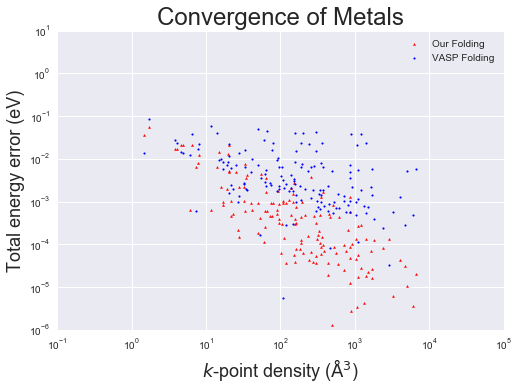

In [13]:
plt.scatter(density,us,label="Our Folding",marker="^",s=5,c='r')
plt.scatter(density,vasp,label="VASP Folding",marker="o",s=3,c='b')
plt.ylabel("Total energy error (eV)",fontsize=18)
plt.xlabel("$k$-point density ($\mathrm{\AA}^{3}$)",fontsize=18)
plt.title("Convergence of Metals",fontsize=24)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,1E1)
plt.xlim(1E-1,1E5)
plt.legend()
plt.savefig("/Users/wileymorgan/Desktop/No_V.pdf")
plt.show()

In [16]:
df = pd.read_csv("../data2/folding/folding_v6.csv",delimiter='\t')

In [18]:
df.sort_values(['diff in errors'],axis=0,inplace=True,ascending=False)

In [7]:
us = list(df['err us'])
vasp = list(df['err vasp'])
density = list(df['kpd'])

In [8]:
cell_type = list(df['cell type'])
grid_type = list(df['grid type'])
element = list(df['element'])
cell_size = list(df['cell size'])

KeyError: 'grid type'

In [15]:
{i:cell_size.count(i) for i in np.unique(cell_size)}

{3: 21, 4: 30, 6: 18, 8: 30, 10: 42, 11: 9}

In [16]:
{i:element.count(i) for i in np.unique(element)}

{'Al': 6, 'Cu': 4, 'K': 44, 'Pd': 5, 'V': 47, 'W': 44}

In [17]:
{i:cell_type.count(i) for i in np.unique(cell_type)}

{'base centered monoclinic': 15,
 'base centered orthorhombic': 24,
 'body centered orthorhombic': 30,
 'body centered tetragonal': 21,
 'simple tetragonal': 30,
 'triclinic': 30}

In [20]:
{i:grid_type.count(i) for i in np.unique(grid_type)}

{'bcc': 135, 'fcc': 28, 'hcp': 13, 'sc': 8}

In [21]:
print(sum(list(df[(df["diff in errors"]>0)]["diff in errors"]))
sum(list(df[(df["diff in errors"]<0)]["diff in errors"]))

SyntaxError: invalid syntax (<ipython-input-21-abb52667c044>, line 2)

In [22]:
df[(df["element"]=="W")]

,Unnamed: 0,element,cell size,cell type,kpd,err us,err vasp,diff in errors,kp file,grid type
30,30,W,6,base centered orthorhombic,13.856415,0.006356,0.040006,0.033650,6,bcc
13,13,W,3,body centered tetragonal,1.732052,0.056410,0.086763,0.030354,3,bcc
31,31,W,6,base centered orthorhombic,60.044463,0.000112,0.028320,0.028208,9,bcc
55,55,W,11,base centered orthorhombic,97.379802,0.000425,0.023675,0.023250,11,bcc
32,32,W,6,base centered orthorhombic,79.674384,0.000913,0.024102,0.023189,12,bcc
56,56,W,11,base centered orthorhombic,712.707249,0.000155,0.023128,0.022974,22,bcc
33,33,W,6,base centered orthorhombic,362.576181,0.000150,0.023068,0.022919,15,bcc
34,34,W,6,base centered orthorhombic,238.638251,0.000043,0.021950,0.021907,18,bcc
35,35,W,6,base centered orthorhombic,1071.562725,0.000003,0.021035,0.021032,21,bcc
41,41,W,8,simple tetragonal,7.698008,0.008059,0.016836,0.008778,4,fcc


In [21]:
df

,Unnamed: 0,element,cell size,cell type,kpd,err us,err vasp,diff in errors,kp file,grid type
116,116,V,6,base centered orthorhombic,11.591872,0.000652,0.060365,0.059714,6,bcc
117,117,V,6,base centered orthorhombic,50.231443,0.000181,0.050610,0.050429,9,bcc
118,118,V,6,base centered orthorhombic,66.653261,0.000604,0.044453,0.043849,12,bcc
119,119,V,6,base centered orthorhombic,303.320639,0.000054,0.041647,0.041593,15,bcc
144,144,V,11,base centered orthorhombic,155.846273,0.000304,0.041399,0.041095,11,bcc
120,120,V,6,base centered orthorhombic,199.637788,0.000062,0.039563,0.039500,18,bcc
145,145,V,11,base centered orthorhombic,1194.821428,0.000027,0.039154,0.039127,22,bcc
121,121,V,6,base centered orthorhombic,896.438068,0.000003,0.037934,0.037932,21,bcc
23,23,W,6,base centered orthorhombic,13.856415,0.006356,0.040006,0.033650,6,bcc
6,6,W,3,body centered tetragonal,1.732052,0.056410,0.086763,0.030354,3,bcc


In [19]:
hist = list(df['diff in errors'])

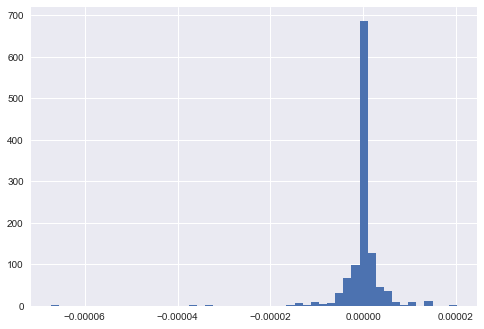

In [20]:
n, bins, patches = plt.hist(hist,50)
delta = bins[1]-bins[0]
bins = np.array(bins)
bins = bins-delta/2

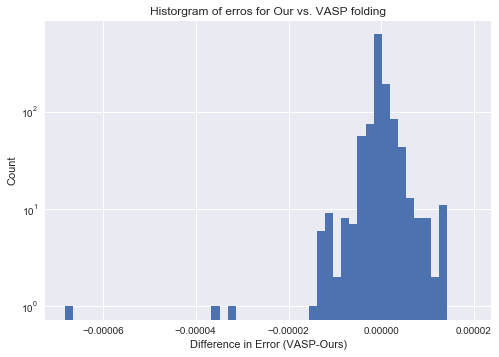

In [21]:
plt.hist(hist,bins)
plt.yscale('log', nonposy='clip')
plt.title("Historgram of erros for Our vs. VASP folding")
plt.xlabel("Difference in Error (VASP-Ours)")
plt.ylabel("Count")
plt.savefig("../plots/FOLDING_US_VASP_HIST.pdf")
plt.show()